In [125]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
file_path = 'C:\\Users\\AND522\\Documents\\MyJabberFiles\\sch537@csiro.au\\'
file_name = 'ACCESS_G_accum_prcp_fc_2016031600.nc'

In [127]:
#open netcdf file 
data = xr.open_mfdataset(file_path+file_name)
#display netcdf file metadata
data

<xarray.Dataset>
Dimensions:       (lat: 154, lon: 137, time: 240)
Coordinates:
  * lat           (lat) float32 -9.140625 -9.375 -9.609375 ... -44.765625 -45.0
  * lon           (lon) float32 110.03906 110.390625 ... 157.5 157.85156
  * time          (time) datetime64[ns] 2016-03-16T01:00:00 ... 2016-03-26
Data variables:
    accum_prcp    (time, lat, lon) float32 dask.array<shape=(240, 154, 137), chunksize=(240, 154, 137)>
    base_date     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    base_time     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    forc_minutes  (time) timedelta64[ns] dask.array<shape=(240,), chunksize=(240,)>
    seg_type      (time) |S4 dask.array<shape=(240,), chunksize=(240,)>
    valid_date    (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    valid_time    (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    wrtn_date     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    wrtn_time     (time) int32 dask.array<shap

In [128]:
#select subset of the data and display
data['time']

<xarray.DataArray 'time' (time: 240)>
array(['2016-03-16T01:00:00.000000000', '2016-03-16T02:00:00.000000000',
       '2016-03-16T03:00:00.000000000', ..., '2016-03-25T22:00:00.000000000',
       '2016-03-25T23:00:00.000000000', '2016-03-26T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-03-16T01:00:00 ... 2016-03-26
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T

In [129]:
grid = data.sel(lat=-30, lon=130, method='nearest')

In [130]:
grid['accum_prcp']

<xarray.DataArray 'accum_prcp' (time: 240)>
dask.array<shape=(240,), dtype=float32, chunksize=(240,)>
Coordinates:
    lat      float32 -30.0
    lon      float32 130.07812
  * time     (time) datetime64[ns] 2016-03-16T01:00:00 ... 2016-03-26
Attributes:
    grid_type:    spatial
    level_type:   single
    units:        kg m-2
    long_name:    accumulated precipitation
    stash_code:   5226
    accum_type:   accumulative
    accum_units:  hrs
    accum_value:  4

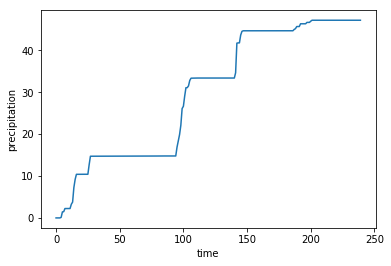

In [131]:
plt.plot(grid['accum_prcp'])
plt.xlabel('time')
plt.ylabel('precipitation')
plt.show()

In [132]:
grid

<xarray.Dataset>
Dimensions:       (time: 240)
Coordinates:
    lat           float32 -30.0
    lon           float32 130.07812
  * time          (time) datetime64[ns] 2016-03-16T01:00:00 ... 2016-03-26
Data variables:
    accum_prcp    (time) float32 dask.array<shape=(240,), chunksize=(240,)>
    base_date     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    base_time     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    forc_minutes  (time) timedelta64[ns] dask.array<shape=(240,), chunksize=(240,)>
    seg_type      (time) |S4 dask.array<shape=(240,), chunksize=(240,)>
    valid_date    (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    valid_time    (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    wrtn_date     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
    wrtn_time     (time) int32 dask.array<shape=(240,), chunksize=(240,)>
Attributes:
    Conventions:   CF-1.5,ACDD-1.3
    institution:   Australian Bureau of Meteorology
    so

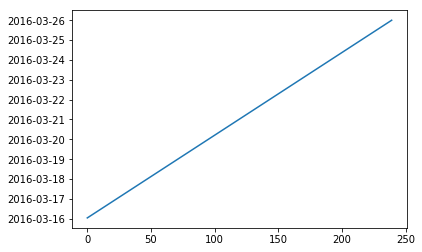

In [133]:
plt.plot(grid['time'])
plt.show()
# about 250 time points over 10 days (for each location)

In [134]:
day = grid.sel(time='2016-03-20')
day

<xarray.Dataset>
Dimensions:       (time: 24)
Coordinates:
    lat           float32 -30.0
    lon           float32 130.07812
  * time          (time) datetime64[ns] 2016-03-20 ... 2016-03-20T23:00:00
Data variables:
    accum_prcp    (time) float32 dask.array<shape=(24,), chunksize=(24,)>
    base_date     (time) int32 dask.array<shape=(24,), chunksize=(24,)>
    base_time     (time) int32 dask.array<shape=(24,), chunksize=(24,)>
    forc_minutes  (time) timedelta64[ns] dask.array<shape=(24,), chunksize=(24,)>
    seg_type      (time) |S4 dask.array<shape=(24,), chunksize=(24,)>
    valid_date    (time) int32 dask.array<shape=(24,), chunksize=(24,)>
    valid_time    (time) int32 dask.array<shape=(24,), chunksize=(24,)>
    wrtn_date     (time) int32 dask.array<shape=(24,), chunksize=(24,)>
    wrtn_time     (time) int32 dask.array<shape=(24,), chunksize=(24,)>
Attributes:
    Conventions:   CF-1.5,ACDD-1.3
    institution:   Australian Bureau of Meteorology
    source:        APS2
 

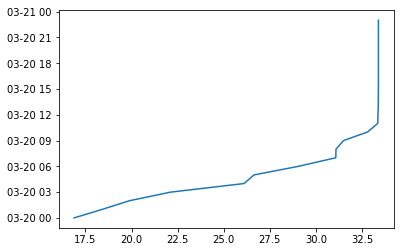

In [135]:
plt.plot(day['accum_prcp'], day['time'])

In [136]:
print(day['accum_prcp'].values)

[16.886536 18.420593 19.890015 22.11914  26.099487 26.633606 29.037476
 31.06836  31.077698 31.488098 32.792725 33.342102 33.35431  33.368042
 33.373657 33.376038 33.376892 33.377136 33.377197 33.37726  33.37738
 33.37744  33.377625 33.377808]


In [137]:
day_prcp = day['accum_prcp'].values[-1] - day['accum_prcp'].values[0]
day_prcp

16.491272

In [138]:
def dates_from_datetimes(data):
    datetimes = pd.to_datetime(data['time'].values)
    dates = set([day.date() for day in datetimes])
    return dates

dates = dates_from_datetimes(grid)

In [139]:
len(dates)

11

In [140]:
def find_daily_prcp(days):
    daily_prcp = pd.DataFrame(columns=['date', 'prcp'])

    for date in days:
        day = grid.sel(time=str(date))
        #print(day['accum_prcp'].values, date)
        day_prcp = day['accum_prcp'].values[-1] - day['accum_prcp'].values[0]
        daily_prcp = daily_prcp.append({'date':date, 'prcp':day_prcp}, ignore_index=True) 
   
    return daily_prcp 

daily_prcp = find_daily_prcp(dates)

In [141]:
daily_prcp = daily_prcp.sort_values(by=['date'])
daily_prcp

,date,prcp
4,2016-03-16,10.415634
1,2016-03-17,4.329285
6,2016-03-18,0.009232
9,2016-03-19,0.026581
3,2016-03-20,16.491272
5,2016-03-21,8.328735
10,2016-03-22,2.894714
7,2016-03-23,1.009583
8,2016-03-24,1.497681
0,2016-03-25,0.000305


<function matplotlib.pyplot.show(*args, **kw)>

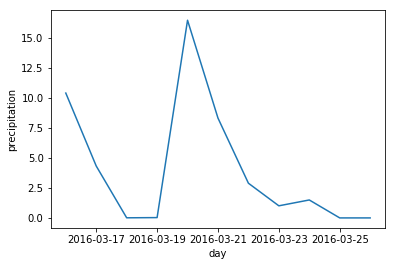

In [142]:
plt.plot(daily_prcp['date'], daily_prcp['prcp'])
plt.ylabel('precipitation')
plt.xlabel('day')
plt.show